# Conhecendo as Funções de Ativação

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
**Alunos**: Amanda L. M. Chaves (almc.ads@uea.edu.br)
## Apresentação

No contexto das redes neurais artificiais, as funções de ativação representam as transformações aplicadas às entradas do neurônio sujeitas aos respectivos graus de contribuição (pesos) para decidir se este neurônio deve ou não disparar. Ao considerar as redes neurais feedforward multilayer perceptron, tais funções de ativação devem ser contínuas e deriváveis, sendo responsáveis por realizarem transformações não-lineares sucessivas da informação fornecida na camada de entrada até a camada de saída, fazendo com que o problema vá tornando-se linearmente separável à medida que adentra-se na rede.

Neste notebook, o seu objetivo é conhecer melhor as funções de ativação disponíveis na literatura e suas respectivas derivadas. Você irá construir gráficos que ilustrem tais funções.

## Requisitos

- Utilizar numpy
- Plotar com matplotlib

In [1]:
# import sympy as sym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Intervalo de Entrada

- Todas as funções devem ser ilustradas no intervalo [-4,+4] com amostras intervaladas em 0.1 no eixo x
- Consulte a documentação de numpy.arange sobre como fazê-lo
- https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange
- Quantas amostras há em tal espaço de entrada?
- Qual o tipo deste dado?
- Qual a forma do espaço de entrada?

In [2]:
# amostra no intervalo [-4, +4]
interval = 0.1
df = np.arange(-4, 4, interval)

print('Há um total de', len(df), 'amostras')
print('Esse dado é do tipo', df.__class__.__name__)
print('O espaço tem o formato', df.shape)

Há um total de 80 amostras
Esse dado é do tipo ndarray
O espaço tem o formato (80,)


### Função de ativação sigmoide

$$f(x) = \frac{1}{1 + e^{-\beta \cdot x}}$$

- Implemente uma função em Python que retorne o valor da função sigmóide para uma dada entrada
- Nesta função, considere beta como parâmetro nomeado com valor igual a 1.0
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função sigmoide
- Em um mesmo gráfico, ilustre 3 valores distintos para $\beta$:
  - $\beta = 0.7$ na cor laranja
  - $\beta = 0.5$ na cor verde
  - $\beta = 0.3$ na cor vermelha
  - Use legendas no gráfico

In [3]:
# definição da funçao sigmoide, com beta = 1.0 por padrão
def sigmoid(x, b = 1.0):
  return 1 / (1 + np.exp(-b*x))

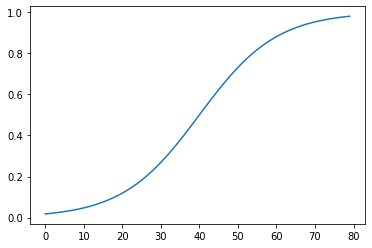

In [4]:
plt.plot(sigmoid(df))

In [5]:
# derivada da sigmoide
def derivative(x, b = 1.0):
    sig = 1 / (1 + np.exp(-b*x))
    derivative = sig * (1 - sig)
    return derivative

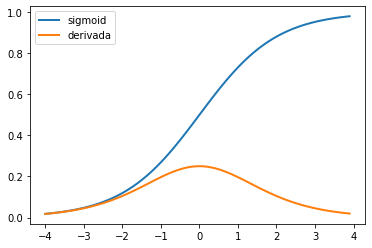

In [6]:
# grafico com sigmoid e derivada
fig, ax = plt.subplots()
ax.plot(df, sigmoid(df), linewidth = 2, label = "sigmoid")
ax.plot(df, derivative(df), linewidth = 2, label = "derivada")
leg = ax.legend();

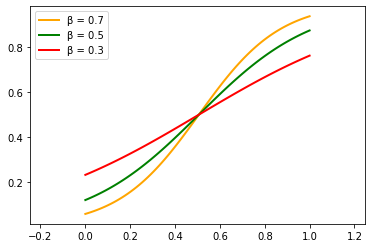

In [7]:
# para sigmoid com b = 0.7 na cor laranja
beta = 0.7
laranja_array = sigmoid(df, beta)

# para sigmoid com b = 0.5 na cor verde
beta = 0.5
verde_array = sigmoid(df, beta)

# para sigmoid com b = 0.3 na cor vermelha
beta = 0.3
vermelho_array = sigmoid(df, beta)

x = np.linspace(0, 1, 80) # vetor com mesma dimensao que a array
fig, ax = plt.subplots()
ax.plot(x, laranja_array, linewidth = 2, label = 'β = 0.7', color = 'orange')
ax.plot(x, verde_array, linewidth = 2, label = 'β = 0.5', color = 'green')
ax.plot(x, vermelho_array, linewidth = 2, label = 'β = 0.3', color = 'red')
ax.axis('equal')
leg = ax.legend();

### Função de Ativação ReLU (Unidade Linear Retificada)

$$f(x) = max(0,x)$$

- Implemente uma função em Python que retorne o valor da função ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função ReLU

In [8]:
# função ReLU
def relu(x):
    return np.maximum(0, x)

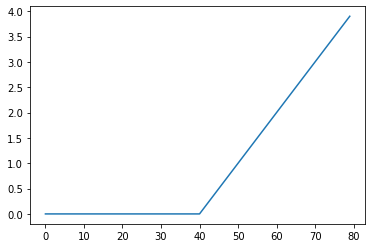

In [9]:
# grafico da função ReLU
plt.plot(relu(df))

In [10]:
def relu_derivative(x, b = 1.0):
    sig = 1 / (1 + np.exp(-b*x))
    derivative = sig * (1 - sig)
    return derivative

### Função de ativação linear (purelin)

$$f(x) = x$$

- Implemente uma função em Python que retorne o valor da função linear para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão

In [11]:
# função purelin
def purelin(x):
    return x

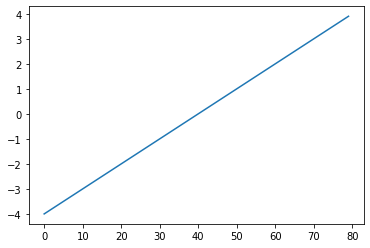

In [12]:
# grafico da função purelin
plt.plot(purelin(df))

### Função de ativação Tangente Hiperbólica

$$f(x) = tanh(x)$$

- Implemente uma função em Python que retorne o valor da função tangente hiperbólica para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão
- Utilize bibliotecas para auxiliar nesta tarefa
- Considere o intervalo (-1,1)

In [13]:
# função tangente hiperbólica
def tanh(x):
    t = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    return t

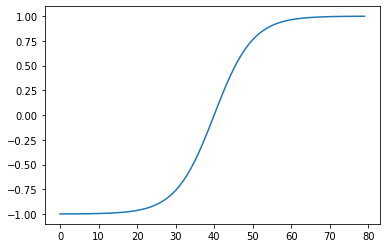

In [14]:
# gráfico da função
plt.plot(tanh(df))

In [15]:
# derivada da tanh
def tanh_derivative(x):
    tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    derivative = 1 - tanh**2
    return derivative

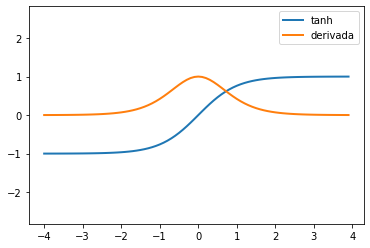

In [16]:
# gráfico comparativo da derivada e a tanh
fig, ax = plt.subplots()
ax.plot(df, tanh(df), linewidth = 2, label = "tanh")
ax.plot(df, tanh_derivative(df), linewidth = 2, label = "derivada")
ax.axis('equal')
leg = ax.legend();

### Função de Ativação Gaussiana

$$f(x) = \exp \left( \frac{-(x - \mu)^2}{2\sigma^2} \right)$$

- $\mu$ é o ponto médio (centro) da curva
- $\sigma$ denota o raio de abertura
- Implemente uma função em Python que retorne o valor da função gaussiana para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão


Considere também os seguintes valores ao plotar a função

- Parâmetros nomeados $\mu = 0$ e $\sigma = 1$
- $\mu = 0, \sigma = 0.3$
- $\mu = 0, \sigma = 0.5$
- $\mu = 0, \sigma = 0.7$
- $\mu = 0, \sigma = 0.9$
- $\mu = 0, \sigma = 1.1$

In [17]:
def gaussian(x, r, u = 0):
    return np.exp((-(x - u)**2) / (2*r**2))
    

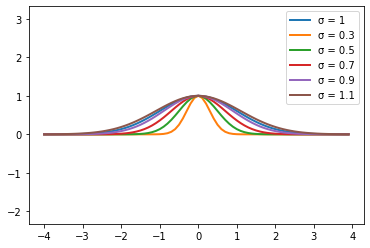

In [18]:
# gráfico da função
fig, ax = plt.subplots()
ax.plot(df, gaussian(df, 1), linewidth = 2, label = "σ = 1")
ax.plot(df, gaussian(df, 0.3), linewidth = 2, label = "σ = 0.3")
ax.plot(df, gaussian(df, 0.5), linewidth = 2, label = "σ = 0.5")
ax.plot(df, gaussian(df, 0.7), linewidth = 2, label = "σ = 0.7")
ax.plot(df, gaussian(df, 0.9), linewidth = 2, label = "σ = 0.9")
ax.plot(df, gaussian(df, 1.1), linewidth = 2, label = "σ = 1.1")
ax.axis('equal')
leg = ax.legend();

In [19]:
# derivada da gaussiana
def gaussian_derivative(x, r, u = 0):
    return (((-x - u) / (r**2)) * gaussian(x, r, u))

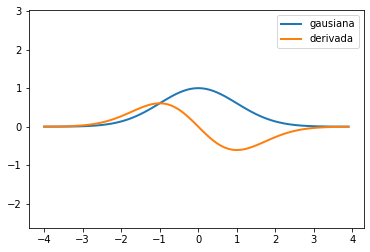

In [20]:
# gráfico comparativo
fig, ax = plt.subplots()
ax.plot(df, gaussian(df, 1), linewidth = 2, label = "gausiana")
ax.plot(df, gaussian_derivative(df, 1), linewidth = 2, label = "derivada")
ax.axis('equal')
leg = ax.legend();

### Função de Ativação Leaky ReLU

$$f(x) = \left\{\begin{array}{cc} 0.01\cdot x & x < 0\\
x & x \geq 0
\end{array}
\right.$$

- Implemente uma função em Python que retorne o valor da função Leaky ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função Leaky ReLU

In [21]:
# função de ativação Leaky ReLU
def leaky_relu(x):
    if (x < 0):
        return 0.01
    else:
        return x

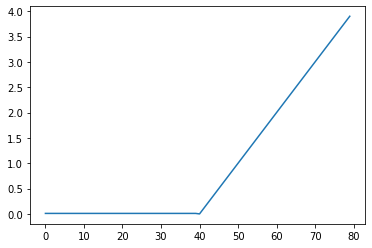

In [22]:
# gráfico de leaky ReLU
leaky_array = np.array([])
for i in range(0, len(df)):
    leaky_array = np.append(leaky_array, leaky_relu(df[i]))

plt.plot(leaky_array)